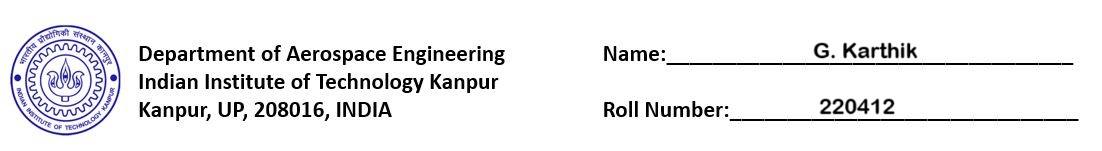

## Investigation of Flow Past an Airfoil with a Rotating Cylinder at Its Leading Edge Using                                                  Physics-Informed Neural Networks 

# IP Formulation

## 1.Introduction

# Problem Statement

* The problem involves investigating the aerodynamic characteristics of an airfoil with a rotating cylinder at its leading edge. The goal is to use Physics-Informed Neural Networks (PINNs) to model flow past an airfoil with rotating cylinder at its leading edge.The purpose of placing a rotating cylinder at its leading edge is to increase lift which must be ensured.

### Chosen Rectangular Domain 
 #### -4c < x < 5c & -4c < y < 4c

## Parameters 

- $\rho $ is the density,
- $ u $ and $ v $ are the velocity components in the $ x $ and $ y $ directions respectively.
-  $ P $ is the pressure field.
* $ Alpha $ is angle of attak
* $ U_inf $ is the Free stream velocity
* $ c $ is the chord length
* $ Omega $ is the angular velocity of the rotating cylinder
* $ Re  $ is the Reynolds number
* $ P_inf $ is the Far-field pressure

## Scaling of parameters

- $\rho $ is constant as incompressible flow 
- $ u $ and $ v $ are scaled using Free stream velocity.
-  $ P $ is scaled using Farfield pressure.
* $ Omega $ is scaled using Chord_length / Freestream velocity

## 2.The Governing Equations

The Navier-Stokes equations describe the conservation of mass and momentum in fluid flow. For a two-dimensional incompressible flow, we have the following equations:

**Continuity Equation**  
The continuity equation ensures mass conservation in the fluid:
\begin{equation}
\nabla \cdot \mathbf{V} = 0,
\tag{1.1}
\end{equation}

where $ \mathbf{V} = (u, v) $ represents the velocity vector in the x and y directions.

**X-Momentum Equation**  
The x-momentum equation represents the conservation of momentum in the x-direction, considering the effects of fluid motion, pressure gradients, and viscosity:
\begin{equation}
\rho \left( \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} \right) = -\frac{\partial P}{\partial x} + \eta \nabla^2 u,
\tag{1.2}
\end{equation}

where $ \rho \ $ is the fluid density, \( u \) and \( v \) are the velocity components in the x and y directions, respectively, \( P \) is the pressure, and $ \eta \ $ is the viscosity coefficient.

**Y-Momentum Equation**  
The y-momentum equation represents the conservation of momentum in the y-direction, considering the effects of fluid motion, pressure gradients, and viscosity:
\begin{equation}
\rho \left( \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} \right) = -\frac{\partial P}{\partial y} + \eta \nabla^2 v,
\tag{1.3}
\end{equation}

where \( v \) is the velocity component in the y-direction and $ \eta \ $ is the viscosity coefficient.


These equations form the foundation of the Navier-Stokes equations for incompressible fluid flow in two dimensions. The continuity equation ensures mass conservation, while the x- and y-momentum equations describe the forces acting on the fluid in the respective directions.


### 3. Initial Condition

The initial conditions define the starting state of the fluid flow, specifying the initial velocity field and pressure distribution at time \( t = 0 \).

**Initial Velocity Field**  
The initial velocity field describes the fluid velocity at every point in the domain at \( t = 0 \) with components aligned with the free-stream velocity:
\begin{equation}
U(x, y, t = 0) = \left( U_{\infty} \cos \alpha, U_{\infty} \sin \alpha \right),
\tag{2.1}
\end{equation}


**Initial Pressure**  
The initial pressure condition specifies the uniform pressure field across the domain at \( t = 0 \):
\begin{equation}
P(x, y, t = 0) = P_{\infty},
\tag{2.2}
\end{equation}



### 4. Boundary Conditions

The boundary conditions specify the behavior of the fluid in the domain at the edges and also along the boundary of cylinder and airfoil

**Inflow Condition**  
The inflow boundary condition sets a uniform velocity profile at the inflow boundary, aligned with the free-stream velocity direction:
\begin{equation}
U(x_{\text{inflow}}, y, t) = \left( U_{\infty} \cos \alpha, U_{\infty} \sin \alpha \right),
\tag{3.1}
\end{equation}


**Outflow Condition**  
A stress-free boundary condition is applied at the outflow boundary :
\begin{equation}
p = \frac{2}{\text{Re}} \frac{\partial u}{\partial x},
\tag{3.2}
\end{equation}


**Cylinder Boundary Conditions**  
The cylinder boundary has two conditions :

- **Tangential Velocity of Rotating Cylinder**:  
  This condition specifies the tangential velocity around the rotating cylinder:
  \begin{equation}
  U_{t}(r = R, \theta, t) = \Omega R \hat{\theta},
  \tag{3.3}
  \end{equation}


- **No-Penetration Condition**:  
  This condition ensures that there is no normal flow into or out of the cylinder surface:
  \begin{equation}
  U_{n}(r = R, \theta, t) = 0,
  \tag{3.4}
  \end{equation}


**Airfoil Surface Conditions**  
The airfoil surface has no-slip and no-penetration conditions:

- **No-Slip Condition**:  
  The no-slip condition ensures that the fluid velocity tangential to the airfoil surface is zero:
  \begin{equation}
  U_{t} = 0,
  \tag{3.5}
  \end{equation}


- **No-Penetration Condition**:  
  This condition ensures there is no flow normal to the airfoil surface:
  \begin{equation}
  U_{n} = 0,
  \tag{3.6}
  \end{equation}


**Far-Field Conditions**  
The far-field boundary conditions ensure that the flow at large distances from the objects resembles the free-stream conditions:

- **Velocity**:  
  At infinity, the velocity approaches the free-stream value:
  \begin{equation}
  \lim_{x, y \to \infty} U(x, y, t) = \left( U_{\infty} \cos \alpha, U_{\infty} \sin \alpha \right),
  \tag{3.7}
  \end{equation}


- **Pressure**:  
  The pressure at infinity is equal to the far-field pressure:
  \begin{equation}
  \lim_{x, y \to \infty} P(x, y, t) = P_{\infty},
  \tag{3.8}
  \end{equation}


### 5. Loss Functions

The loss functions quantify the deviations of the predicted solutions from the governing equations, initial conditions, and boundary conditions. 

**Continuity Loss**  
The continuity loss ensures that the incompressibility condition (mass conservation) is satisfied:
\begin{equation}
L_{\text{cont}} = \lambda_1 \frac{1}{N_{\text{p}}} \sum_{i=1}^{N_{\text{p}}} \left( \frac{\partial u(x_i, y_i)}{\partial x} + \frac{\partial v(x_i, y_i)}{\partial y} \right)^2,
\tag{4.1}
\end{equation}

where $ N_p \ $ is the number of points used for the x-momentum equation, $\lambda_1 $ is a weighting factor

***X-Momentum Loss**  
The x-momentum loss enforces the conservation of momentum in the x-direction, including the effects of viscosity:
\begin{equation}
L_{x\text{-mom}} = \lambda_2 \frac{1}{N_f} \sum_{i=1}^{N_f} \left( \frac{\partial u(x_i, y_i, t_f)}{\partial t} + u \frac{\partial u(x_i, y_i, t_f)}{\partial x} + v \frac{\partial u}{\partial y} + \frac{1}{\rho} \frac{\partial P}{\partial x} - \frac{\eta}{\rho} \nabla^2 u \right)^2,
\tag{4.2}
\end{equation}

where $ N_f \ $ is the number of points used for the x-momentum equation, $\lambda_2 $ is a weighting factor, and $ \eta \nabla^2 u \ $ represents the viscosity term in the x-direction.

**Y-Momentum Loss**  
The y-momentum loss enforces the conservation of momentum in the y-direction, including the effects of viscosity:
\begin{equation}
L_{y\text{-mom}} = \lambda_3 \frac{1}{N_k} \sum_{i=1}^{N_k} \left( \frac{\partial v(x_i, y_i, t_f)}{\partial t} + u \frac{\partial v(x_i, y_i, t_f)}{\partial x} + v \frac{\partial v}{\partial y} + \frac{1}{\rho} \frac{\partial P}{\partial y} - \frac{\eta}{\rho} \nabla^2 v \right)^2,
\tag{4.3}
\end{equation}

where $ N_k \ $ is the number of points used for the y-momentum equation, $\lambda_3 $ is a weighting factor, and $ \eta \nabla^2 v \ $ represents the viscosity term in the y-direction.


**Initial Condition Loss (I.C)**  
The initial condition loss ensures that the model predictions match the initial velocity field at time \( t = 0 \):
\begin{equation}
L_{I.C} = A_1 \frac{1}{N_0} \sum_{i=1}^{N_0} \| U(x_i, y_i, 0) - (U_{\infty} \cos \alpha, U_{\infty} \sin \alpha) \|^2,
\tag{4.4}
\end{equation}

where $ N_0 \ $ is the number of initial condition points and $ A_1 \ $ is a weighting factor.

**Boundary Condition Loss (BC)**  
The boundary condition loss ensures that the boundary values conform to the specified boundary conditions:
\begin{equation}
L_{BC} = B \frac{1}{N_b} \sum_{i=1}^{N_b} \| U(x_i, y_i, t) - (U_{\infty} \cos \alpha, U_{\infty} \sin \alpha) \|^2,
\tag{4.5}
\end{equation}

where $ N_b \ $ is the number of boundary condition points and $ B \ $ is a weighting factor.

**Total Loss**  
The total loss combines all the individual loss components 
\begin{equation}
L_{\text{Total}} =  \frac{1}{N} \sum_{i=1}^{N} (L_{\text{cont}} + L_{x\text{-mom}} + L_{y\text{-mom}} + L_{I.C} + L_{BC}).
\tag{4.6}
\end{equation}

This total loss function guides the model to satisfy the continuity, momentum conservation, initial conditions, and boundary conditions.


## 6. Methodology

### 6.1 Physics-Informed Neural Networks (PINNs)

In this problem, the Navier-Stokes equations for incompressible flow are solved using a Physics-Informed Neural Network (PINN) architecture. The model is designed to predict three fields: the horizontal velocity component \( u \), the vertical velocity component \( v \), and the pressure \( p \) around an airfoil with a rotating cylinder.

### 6.2 Hyperparameters

- **Number of hidden layers**: 4
- **Neurons per layer**: 50
- **Activation function**: tanh
- **Optimizer**: Adam optimizer with a learning rate of $ 1 \times 10^{-3}\ $
- **Training data**: 40,000 points sampled from the domain, and 2,000 points sampled from the boundary.
- **Epochs**: 5000

### 6.3 Neural Network Architecture

Physics-Informed Neural Network (PINN) is used to approximate the solution fields for $ u(x, y) \ $, $ v(x, y) \ $, and $ p(x, y) \ $, which are governed by the Navier-Stokes equations. The PINN is trained to satisfy the differential equations and boundary conditions simultaneously.

Each component (velocity components $ u \ $ and $ v \ $, and pressure $ p \ $) is outputted by the same network, which consists of:

- **Hidden Layers**: 4 hidden layers, each with 50 neurons.
- **Activation Function**: tanh activation function in each hidden layer.
- **Output Layer**: Three neurons in the final output layer, corresponding to  $ u \ $, $ v \ $, and $ p \$.

The network takes spatial coordinates $ (x, y) \ $ as inputs, processes them through multiple hidden layers, and outputs the scalar values for $ u \ $, $ v \ $, and $ p \$.

### 6.4 Boundary and Initial Conditions

The following boundary conditions are applied to the network:

- **Inflow Boundary Conditions**:  
  - $ u(x_{\text{inflow}}, y, t) = U_{\infty} \cos(\alpha) \ $
  - $ v(x_{\text{inflow}}, y, t) = U_{\infty} \sin(\alpha) \ $

- **Cylinder Boundary Conditions**:  
  - Tangential velocity of the cylinder: $ u_{t}(r = R, \theta, t) = \Omega R \hat{\theta} \ $
  - No-penetration condition: $ u_{n}(r = R, \theta, t) = 0 \$

- **Airfoil Surface Boundary Conditions**:  
  - No-slip condition: $ u_t = 0 ,  u_n = 0 $

- **Far-Field Boundary Conditions**:  
  - Velocity: $ U(x, y) \to (U_{\infty} \cos \alpha, U_{\infty} \sin \alpha) \ $ as $ x, y \to \infty \ $
  - Pressure: $ P(x, y) \to P_{\infty} \ $ as $ x, y \to \infty \ $

- **Outflow Boundary Condition**:  
  - Stress-free boundary condition: $ p = \frac{2}{\text{Re}} \frac{\partial u}{\partial x} \ $ at the outflow boundary.


### 6.5 Training Process

The training process involves minimizing a total loss function, which combines the residuals from the governing equations and the boundary conditions:

1. **Total Loss**: The total loss is computed as a sum of individual losses from:
   - **Continuity** loss.
   - **X&Y-momentum** residual.
   - **Boundary Condition Residuals** for the inflow, cylinder, airfoil, far-field, and outflow boundaries.

2. **Optimization**:  
   - The Adam optimizer is used to minimize the total loss with a learning rate of $ 1 \times 10^{-3}\ $.
   - Training proceeds for 5000 epochs to reduce the loss and approximate the solution to the Navier-Stokes equations.

### 6.6 Visualization of Results

The trained model outputs predictions for $ u $, $ v $, and $ p $ over a grid in the domain, which are visualized as:

- **Velocity Magnitude Plot**: The magnitude of the velocity vector $ \sqrt{u^2 + v^2} $ is visualized as a contour plot over the flow domain, illustrating the overall speed and flow characteristics around the airfoil and rotating cylinder.

- **Velocity Components**: The horizontal and vertical velocity components, $ u(x, y) $ and $ v(x, y) $, are plotted to provide insight into the directional flow patterns and effects of boundary conditions across the domain.

- **Pressure Distribution**: The pressure field $ p(x, y) $ is plotted to display the pressure variations around the airfoil and cylinder, which are essential for understanding lift and drag forces acting on the structure.

- **Coefficient of Pressure ($ C_p $)**: The coefficient of pressure $ C_p = \frac{p - P_{\infty}}{\frac{1}{2} \rho U_{\infty}^2} $ is plotted along the airfoil surface, highlighting the pressure distribution relative to freestream conditions and revealing aerodynamic characteristics critical for performance analysis.

- **Coefficient of Pressure ($ C_p $) along chord**: It is plotted using $ C_p = 1 - \frac{{V}^2}{ U_{\infty}^2} $ along the chord for upper and lower surface of airfoil



## Purpose of placing a Rotating Cylinder at the Leading Edge of an Airfoil

The rotating cylinder at the leading edge of an airfoil is used to increase lift by enhancing phenomenon known as the Magnus effect. This setup is useful for applications requiring high lift-to-drag ratios and can also delay flow separation, allowing the airfoil to operate effectively at higher angles of attack.

- **Magnus Effect**: The rotation of the cylinder manipulates the airflow by accelerating it on the upper surface and decelerating it on the lower surface, due to frictional forces between the cylinder and the air. This creates asymmetric circulation around the airfoil.
  
- **Bernoulli’s Principle**: The faster flow over the upper surface decreases pressure, while the slower flow below increases pressure, resulting in a lift-generating pressure differential.

- **Kutta-Joukowski Theorem**: The increased circulation from the rotating cylinder directly enhances the lift generated by the airfoil, as lift is proportional to the strength of circulation.

- **Flow Separation Prevention**: The high velocity on the upper surface, induced by the rotating cylinder, keeps the boundary layer attached longer, preventing early stall at higher angles of attack.

Placing a rotating cylinder increases lift and allows higher operational angles by altering the airflow to create greater pressure differentials and circulation around the airfoil.


## Using Pinns with Deepxde

## Code

In [ ]:
import deepxde as dde 
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

dde.config.set_random_seed(48)
dde.config.set_default_float('float64')

# parameters
U_inf = 1.0         
rho = 1.0 
alpha = np.radians(20)  
chord_length = 1.0
T = chord_length / U_inf
Omega = U_inf / cylinder_radius  
Omega_nd =  0 * Omega / T    
cylinder_radius = 0.07 / chord_length
cylinder_center_x = cylinder_radius   

def naca_0024(x):
    t = 0.24
    return 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1036 * x**4)

x_airfoil = np.linspace(cylinder_radius, 1, 100)
y_upper_airfoil = naca_0024(x_airfoil)
y_lower_airfoil = -naca_0024(x_airfoil)

# governing equations 
def navier_stokes(x, y):
    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    u_x = dde.grad.jacobian(u, x, i=0, j=0)
    u_y = dde.grad.jacobian(u, x, i=0, j=1)
    v_x = dde.grad.jacobian(v, x, i=0, j=0)
    v_y = dde.grad.jacobian(v, x, i=0, j=1)
    p_x = dde.grad.jacobian(p, x, i=0, j=0)
    p_y = dde.grad.jacobian(p, x, i=0, j=1)
    
    # Continuity and momentum equations
    continuity = u_x + v_y
    x_momentum = rho * ( u * u_x + v * u_y ) + p_x
    y_momentum = rho * ( u * v_x + v * v_y ) + p_y
    
    return continuity, x_momentum, y_momentum


# boundary conditions
def inflow_boundary(x, on_boundary):
    return on_boundary and (x[0] == xmin)

def cylinder_boundary(x, on_boundary):
    return on_boundary and  ( -0.01 < x[0] < cylinder_radius) and (-0.15< x[1] < 0.15 )

def airfoil_boundary(x, on_boundary):
    return on_boundary and (not farfield.on_boundary(x))

def farfield_boundary(x, on_boundary):
    return on_boundary and (x[0] == xmin or x[0] == xmax or x[1] == ymin or x[1] == ymax)

def outflow_boundary(x, on_boundary):
    return on_boundary and (x[0] == xmax)  

def u_inflow(x):
    return U_inf * np.cos(alpha)

def v_inflow(x):
    return U_inf * np.sin(alpha)

def tangential_velocity_cylinder(X):
    x, y = X[:, 0], X[:, 1] 
    theta = np.arctan2(y, x - cylinder_center_x) 
    return Omega_nd * cylinder_radius * np.cos(theta)

# geometry 
xmin, xmax = -4, 5
ymin, ymax = -4, 4
farfield = dde.geometry.Rectangle([xmin, ymin], [xmax, ymax])
airfoil = dde.geometry.Rectangle([0, -0.12], [1, 0.12])
geom = dde.geometry.CSGDifference(farfield, airfoil)

# Boundary conditions

# Inflow boundary conditions for u and v
bc_inlet_u = dde.DirichletBC(geom, u_inflow , farfield_boundary, component=0)
bc_inlet_v = dde.DirichletBC(geom, v_inflow ,farfield_boundary, component=1)

bc_cylinder_tangential = dde.DirichletBC(
    geom, 
    tangential_velocity_cylinder, 
    cylinder_boundary, 
    component=0  
)

bc_cylinder_normal = dde.DirichletBC(geom, lambda x: 0, cylinder_boundary, component=1)

bc_airfoil_noslip_u = dde.DirichletBC(geom, lambda x: 0, airfoil_boundary, component=0)

bc_airfoil_noslip_v = dde.DirichletBC(geom, lambda x: 0, airfoil_boundary, component=1)

bc_farfield_p = dde.DirichletBC(geom, lambda x: 0, farfield_boundary, component=2)

bc_outflow = dde.DirichletBC(geom, lambda x: 0, outflow_boundary, component=2)

# Training data for PDE
# Define and train the model
data = dde.data.PDE(
    geom,
    navier_stokes,
    [bc_inlet_u, bc_inlet_v, bc_cylinder_tangential ,bc_cylinder_normal, bc_airfoil_noslip_u, bc_airfoil_noslip_v, bc_farfield_p,bc_outflow],
    num_domain=40000,
    num_boundary=2000
)

net = dde.maps.FNN([2] + [50] * 4 + [3], "tanh", "Glorot uniform")
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)
losshistory, train_state = model.train(epochs=5000)

plt.figure(figsize=(10, 6))

# total loss
num_components = len(losshistory.loss_train[0])  
colors = plt.cm.viridis(np.linspace(0, 1, num_components))  

epochs_to_plot = min(100, len(losshistory.loss_train))

for i in range(num_components):
    component_loss = [loss[i] for loss in losshistory.loss_train[:epochs_to_plot]]
    plt.plot(range(epochs_to_plot), component_loss, label=f"Component {i+1}", color=colors[i], linewidth=1.5)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(title="Loss Components")
plt.title("Loss vs Epoch")
plt.xlabel("x* 10^3")
plt.ylabel("y")
plt.xlim(0, 1)
plt.ylim(-0.001,  2)
plt.show()


# Visualization of flow field
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(x, y)
XY = np.vstack([X.ravel(), Y.ravel()]).T

# Predictions for u, v, p 
u = model.predict(XY)[:, 0].reshape(X.shape)
v = model.predict(XY)[:, 1].reshape(X.shape)
p = model.predict(XY)[:, 2].reshape(X.shape)
velocity_magnitude = np.sqrt(u**2 + v**2)

# velocity magnitude
plt.figure(figsize=(10, 5))
contour = plt.contourf(X, Y, velocity_magnitude, levels=100, cmap='jet')
plt.colorbar(contour, label="Velocity Magnitude")

plt.fill_between(x_airfoil, y_upper_airfoil, y_lower_airfoil, color='gray', zorder=10)

plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='gray', fill=True, zorder=10))

plt.plot(x_airfoil, y_upper_airfoil, 'k', linewidth=1)
plt.plot(x_airfoil, y_lower_airfoil, 'k', linewidth=1)
plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='black', fill=False, zorder=10))
plt.xlim(-4, 5)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Velocity Magnitude Around the Airfoil")
plt.show()

# Coefficient of Pressure (Cp)
Cp = (p) / (0.5 * rho * U_inf**2)
plt.figure()
contour_cp = plt.contourf(X, Y, Cp, levels=100, cmap='coolwarm')
plt.fill_between(x_airfoil, y_upper_airfoil, y_lower_airfoil, color='gray', zorder=10)

plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='gray', fill=True, zorder=10))

plt.plot(x_airfoil, y_upper_airfoil, 'k', linewidth=1)
plt.plot(x_airfoil, y_lower_airfoil, 'k', linewidth=1)
plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='black', fill=False, zorder=10))
plt.colorbar(contour_cp, label="Coefficient of Pressure ")
plt.title("Coefficient of Pressure (Cp) Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# u component of velocity
plt.figure(figsize=(10, 5))
contour_u = plt.contourf(X, Y, u, levels=100, cmap='coolwarm')
plt.colorbar(contour_u, label="u-velocity ")
plt.title("u-velocity Component ")
plt.fill_between(x_airfoil, y_upper_airfoil, y_lower_airfoil, color='gray', zorder=10)

plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='gray', fill=True, zorder=10))

plt.plot(x_airfoil, y_upper_airfoil, 'k', linewidth=1)
plt.plot(x_airfoil, y_lower_airfoil, 'k', linewidth=1)
plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='black', fill=False, zorder=10))
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# v component of velocity
plt.figure(figsize=(10, 5))
contour_v = plt.contourf(X, Y, v, levels=100, cmap='coolwarm')
plt.colorbar(contour_v, label="v-velocity ")
plt.fill_between(x_airfoil, y_upper_airfoil, y_lower_airfoil, color='gray', zorder=10)

plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='gray', fill=True, zorder=10))

plt.plot(x_airfoil, y_upper_airfoil, 'k', linewidth=1)
plt.plot(x_airfoil, y_lower_airfoil, 'k', linewidth=1)
plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='black', fill=False, zorder=10))
plt.title("v-velocity Component ")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# pressure profile
plt.figure(figsize=(10, 5))
contour_p = plt.contourf(X, Y, p, levels=100, cmap='plasma')
plt.colorbar(contour_p, label="Pressure")
plt.fill_between(x_airfoil, y_upper_airfoil, y_lower_airfoil, color='gray', zorder=10)

plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='gray', fill=True, zorder=10))

plt.plot(x_airfoil, y_upper_airfoil, 'k', linewidth=1)
plt.plot(x_airfoil, y_lower_airfoil, 'k', linewidth=1)
plt.gca().add_patch(plt.Circle((cylinder_center_x, 0), cylinder_radius, color='black', fill=False, zorder=10))
plt.title("Pressure Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()




### Cp along chord length of airfoil 

In [ ]:
import deepxde as dde
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

U_inf = 1.0         
rho = 1.0 
alpha = np.radians(20)  
chord_length = 1.0
cylinder_radius = 0.07 / chord_length
cylinder_center_x = cylinder_radius   

def naca_0024(x):
    t = 0.24
    return 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1036 * x**4)

x_airfoil = np.linspace(cylinder_radius, 1, 100)
y_upper_airfoil = naca_0024(x_airfoil)
y_lower_airfoil = -naca_0024(x_airfoil)

dx, dy = 0.01, 0.01
xmin, xmax, ymin, ymax = -4, 5, -4, 4
x = np.arange(xmin, xmax + dx, dx)
y = np.arange(ymin, ymax + dy, dy)
X, Y = np.meshgrid(x, y)
grid_points = np.vstack([X.ravel(), Y.ravel()]).T

predictions = model.predict(grid_points)
u = predictions[:, 0].reshape(X.shape)
v = predictions[:, 1].reshape(X.shape)
p = predictions[:, 2].reshape(X.shape)

U_magnitude = np.sqrt(u**2 + v**2)
Cp = 1 - (U_magnitude / U_inf)**2

Cp_values_upper = griddata((X.ravel(), Y.ravel()), Cp.ravel(), (x_airfoil, y_upper_airfoil), method='linear')
Cp_values_lower = griddata((X.ravel(), Y.ravel()), Cp.ravel(), (x_airfoil, y_lower_airfoil), method='linear')

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_airfoil / chord_length, Cp_values_upper, marker='o', color='b', label='Cp (Upper Surface)')
ax.plot(x_airfoil / chord_length, Cp_values_lower, marker='o', color='r', label='Cp (Lower Surface)')
ax.set_title('Pressure Coefficient (Cp) vs x/c (Airfoil Surface)')
ax.set_xlabel('x/c (Normalized Chord Length)')
ax.set_ylabel('Cp')
ax.invert_yaxis() 
ax.grid(True)
ax.legend()

plt.show()


### Results Obtained

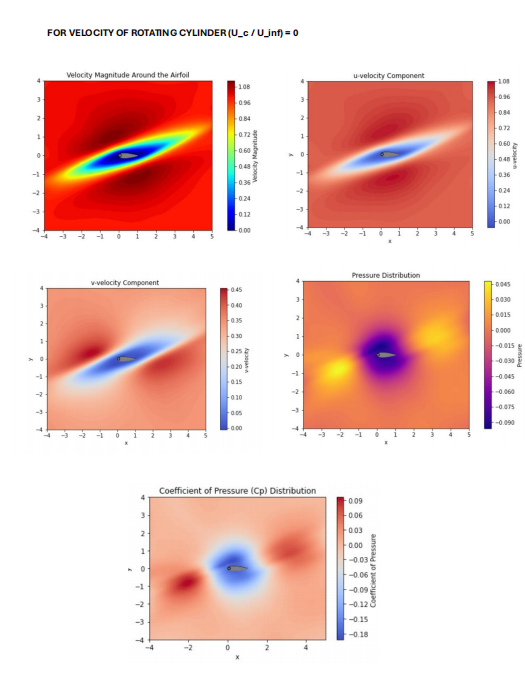

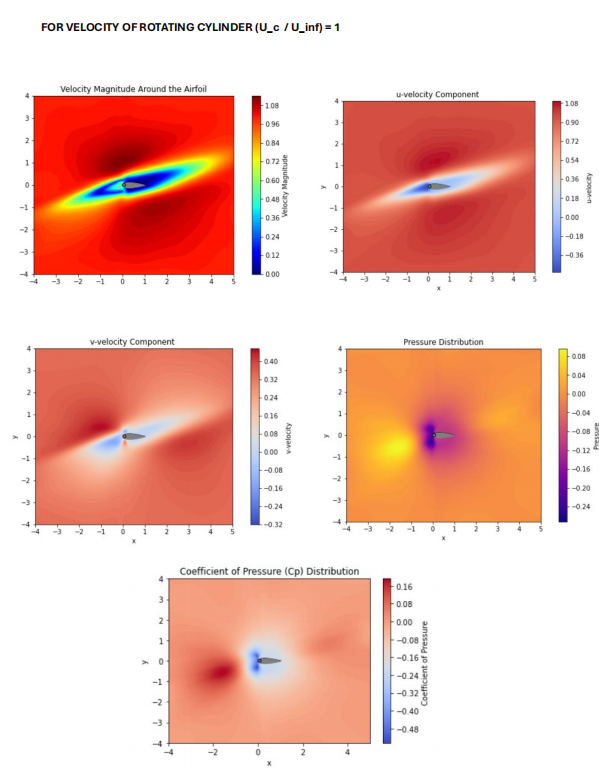

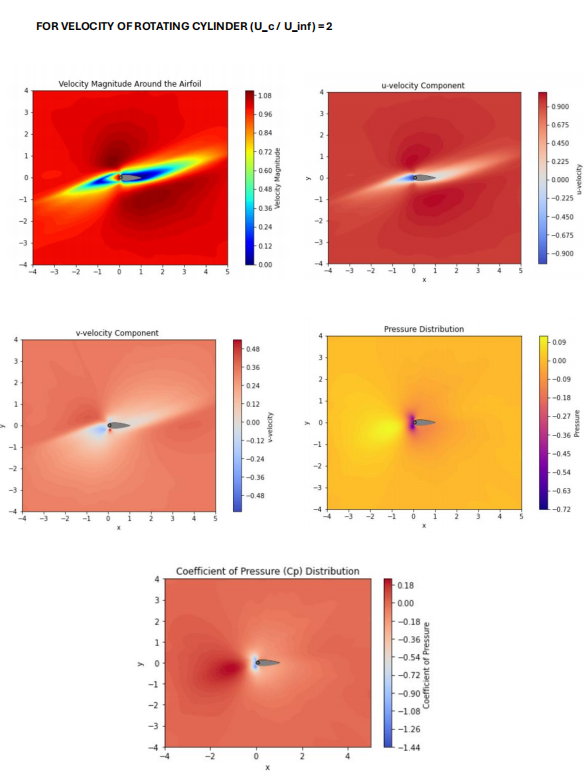

### Pressure Distribution along the Airfoil Surface ( $  C_p \ $ vs. $ x/c \ $ )

The **pressure distribution** along an airfoil surface provides critical insights into lift generation and airflow behavior. This distribution is often plotted as the **pressure coefficient $  C_p \ $ vs. the normalized chord length \( x/c \)**, where:
- $  C_p \ $ quantifies the relative pressure at different points on the airfoil surface.

 We need to observe an **asymmetric $  C_p \ $ distribution**:
- **Upper Surface**: Lower $  C_p \ $ where rotation aligns with freestream, contributing to enhanced lift.
- **Lower Surface**: Higher $  C_p \ $ where rotation opposes freestream.


### For the pressure distribution plot I need to get an asymmetric pressure distribution on below and above surfaces of my airfoil. But the plots obtained are not as expected which says my results obtained were incorrect.

### For U_c =0

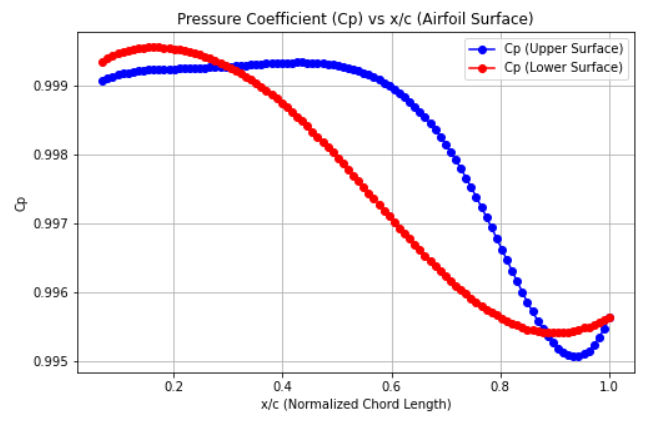

### For U_c/U_inf = 1

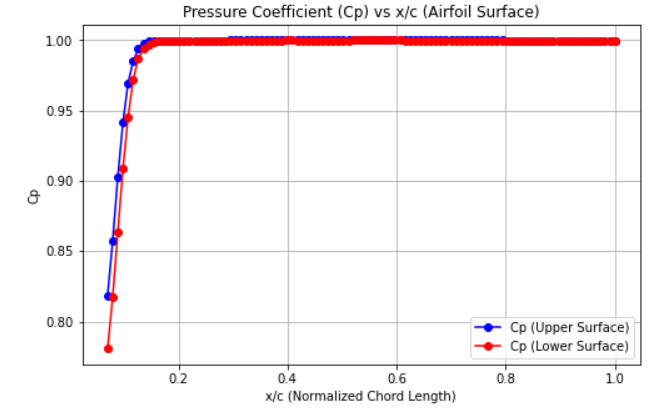


#### Lift Enhancement with Rotation
The asymmetric $  C_p \ $ distribution caused by the rotating cylinder increases the pressure differential between the upper and lower surfaces, directly contributing to greater lift. By comparing this with a **non-rotating case** (where $  C_p \ $ would be more symmetric), the effect of rotation on lift generation becomes evident. In the non-rotating case, the pressure distribution is more balanced, resulting in a lower lift force.

- **Higher Lift**: The rotating cylinder’s induced circulation increases the pressure difference across the airfoil, leading to increased lift.

For analysis on comparing the $  C_p \ $ distribution for rotating and non-rotating cases we must see the increased lift contribution from the rotating cylinder.


### Incorrect plots have been obtained as i could not implement things in my code correctly. I have tried correcting them but couldnt figure it out. 

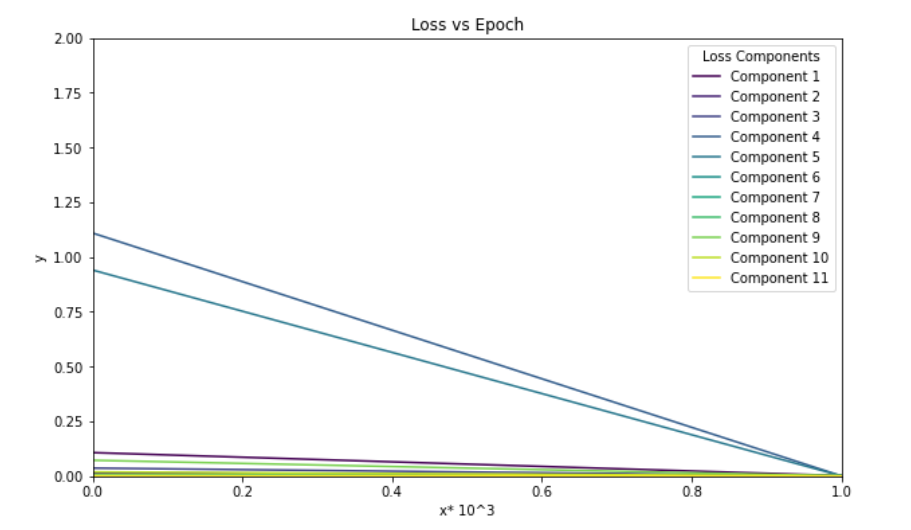

### Loss Components Breakdown

- **Component 3**: Represents the total loss
  
- **Component 2**: Loss for the inflow_U B.C

- **Component 1**: Loss for the inflow_V B.C

- **Component 4**: Loss for the cylinder_t B.C

- **Component 5**: Loss for the cylinder_n B.C

- **Component 6**: Loss for the airfoil_t no-slip condition

- **Component 7**: Loss for the airfoil_n no-slip condition

- **Component 8**: Loss for the far-field B.C

- **Component 9**: Loss for the outflow B.C

- **Component 10**: Loss for the Navier-Stokes equations




### Observations
1. **Velocity Magnitude**: The velocity magnitude plots show distinct regions of high velocity around the airfoil and rotating cylinder. However, inconsistencies in the expected velocity distribution are visible, especially as the cylinder rotation speed increases.
   
2. **Velocity Components (u and v)**: The u-velocity and v-velocity component plots display gradients, but appear inaccurate in some cases. For higher rotational speeds, the gradients don't align with theoretical expectations, suggesting that the PINN model may struggle with capturing the effects of cylinder rotation.

3. **Pressure Distribution**: The pressure distribution around the airfoil seems off, especially at higher rotation speeds. Ideally, there should be a clear pressure difference across the cylinder due to rotation (indicating lift), but this isn’t represented correctly.

4. **Coefficient of Pressure (Cp) Distribution**: The Cp distribution does not show the expected trend of lower pressure on the suction side of the airfoil and higher pressure on the pressure side, especially for higher rotation speeds. This suggests the model is not accurately capturing the interaction between the rotating cylinder and the surrounding flow.

5. **Loss vs. Epoch**: The loss plot indicates that although the model is converging, it may be getting stuck in local minima, preventing it from accurately learning the flow dynamics.



### Limitations
- PINNs can struggle with numerical stability, especially when handling complex fluid dynamics with high gradients, such as around the rotating cylinder.
- The boundary conditions may not have been implemented accurately, leading to unrealistic flow fields.
- The grid resolution and number of training points might not be sufficient to capture detailed flow dynamics, as PINNs require a dense set of points to resolve sharp gradients.
- The current neural network model, a simple feedforward network with tanh activations, may lack the complexity needed to model intricate flow features near boundaries and high rotational regions.
- The model's hyperparameters, like learning rate and number of layers, might not be optimized, affecting its ability to achieve accurate results.




### Lessons Learned
1. **Importance of Boundary Conditions**: Correct boundary condition implementation is crucial in fluid flow simulations. Even minor discrepancies can lead to significant errors in velocity and pressure fields.

2. **Network Architecture Sensitivity**: PINNs require careful tuning of network architecture and hyperparameters to capture complex physical phenomena accurately.

3. **Training Data Requirements**: For complex flow simulations, a higher density of training points and possibly adaptive sampling near regions of high gradients (like the cylinder boundary) are necessary for better accuracy.

4. **Need for Post-Processing Validation**: Intermediate validation steps, such as comparing predicted and theoretical flow fields, can help identify issues in model training early.


### Possibilities for Extending the Work
- Implement more precise boundary conditions, especially for the rotating cylinder, to better enforce tangential velocities at the boundary.
- Use adaptive mesh refinement around the cylinder and airfoil boundaries to improve resolution where flow features are more complex.
- Experiment with more advanced neural network architectures, such as deep feedforward networks or convolutional neural networks, which may better capture spatial features and gradients.
- Use automated hyperparameter tuning techniques to optimize learning rate, epochs, and network depth for better convergence.
- Simulate flow at different Reynolds numbers to analyze how the solution changes with flow conditions, allowing for a more comprehensive analysis.
- Apply transfer learning by first training the model on a simpler setup (like a fixed cylinder) before introducing rotation to take advantage of learned features.
- Explore other activation functions that may better capture the nonlinearities in fluid dynamics compared to the tanh function.


## Conclusions
The project highlights challenges in accurately simulating flow past an airfoil with a rotating cylinder using PINNs. The PINN model struggled to represent the flow dynamics accurately, as evidenced by the velocity and pressure discrepancies. This underscores the importance of proper boundary condition implementation and suggests that more complex network architectures may be required to capture the fluid dynamics around rotating bodies effectively.


### Reference: Flow Past an Airfoil with a Leading-Edge Rotating Cylinder

 Article on ResearchGate:  
[Flow Control for an Airfoil with Leading-Edge Rotation: An Experimental Study](https://www.researchgate.net/publication/245429665_Flow_Control_for_an_Airfoil_with_Leading-Edge_Rotation_An_Experimental_Study)



